In [166]:
import tensorflow as tf 
from tensorflow.keras.datasets import mnist
import numpy as np 
import matplotlib.pyplot as plt
import random

In [122]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

The image wee see is 6


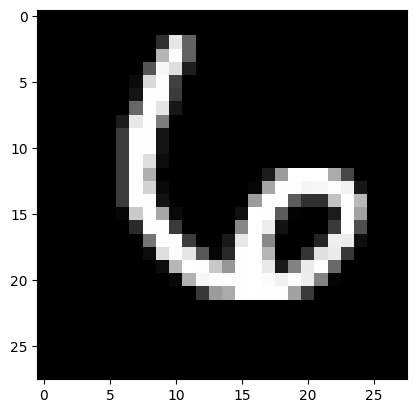

In [123]:
idx = random.randint(0,X_train.shape[0]-1)
img2show, label = X_train[idx],y_train[idx]
print(f'The image wee see is {label}')
plt.imshow(img2show, cmap='gray')

In [124]:
X_train, X_test = X_train.reshape(-1, 28*28), X_test.reshape(-1, 28*28)
y_train, y_test=tf.keras.utils.to_categorical(y_train, 10), tf.keras.utils.to_categorical(y_test, 10)
X_train, X_test = X_train/255.0, X_test/255.0

In [152]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

In [153]:
X_train[0].shape

(784,)

In [156]:
model = Sequential()
model.add(Dense(784, activation='relu', input_shape = (784,)))
model.add(Dense(36, activation = 'relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 784)               615440    
                                                                 
 dense_17 (Dense)            (None, 36)                28260     
                                                                 
 dense_18 (Dense)            (None, 10)                370       
                                                                 
Total params: 644,070
Trainable params: 644,070
Non-trainable params: 0
_________________________________________________________________


In [158]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [159]:
model.fit(X_train, y_train, epochs=20, batch_size=36, validation_data=(X_test, y_test))

Epoch 1/20
1667/1667 [==============================] - 21s 12ms/step - loss: 0.6083 - accuracy: 0.8408 - val_loss: 0.3041 - val_accuracy: 0.9158
Epoch 2/20
1667/1667 [==============================] - 18s 11ms/step - loss: 0.2826 - accuracy: 0.9203 - val_loss: 0.2423 - val_accuracy: 0.9297
Epoch 3/20
1667/1667 [==============================] - 18s 11ms/step - loss: 0.2335 - accuracy: 0.9339 - val_loss: 0.2095 - val_accuracy: 0.9387
Epoch 4/20
1667/1667 [==============================] - 15s 9ms/step - loss: 0.2008 - accuracy: 0.9427 - val_loss: 0.1839 - val_accuracy: 0.9458
Epoch 5/20
1667/1667 [==============================] - 15s 9ms/step - loss: 0.1758 - accuracy: 0.9499 - val_loss: 0.1633 - val_accuracy: 0.9542
Epoch 6/20
1667/1667 [==============================] - 19s 12ms/step - loss: 0.1557 - accuracy: 0.9561 - val_loss: 0.1482 - val_accuracy: 0.9570
Epoch 7/20
1667/1667 [==============================] - 17s 10ms/step - loss: 0.1391 - accuracy: 0.9602 - val_loss: 0.1350 - v

In [162]:
idx_test = random.randint(0, X_test.shape[0]-1)
img_test = X_test[idx_test]
img_test = np.expand_dims(img_test, axis=0)
prediction = model.predict(img_test)
predict_label = np.argmax(prediction)
true_label = y_test[idx_test]
print(f'The predicted label is {predict_label} and the true label is {np.argmax(true_label)}')



1/1 [==============================] - 0s 35ms/step
The predicted label is 3 and the true label is 3


In [164]:
prediction
true_label

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)